In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import anndata as ad

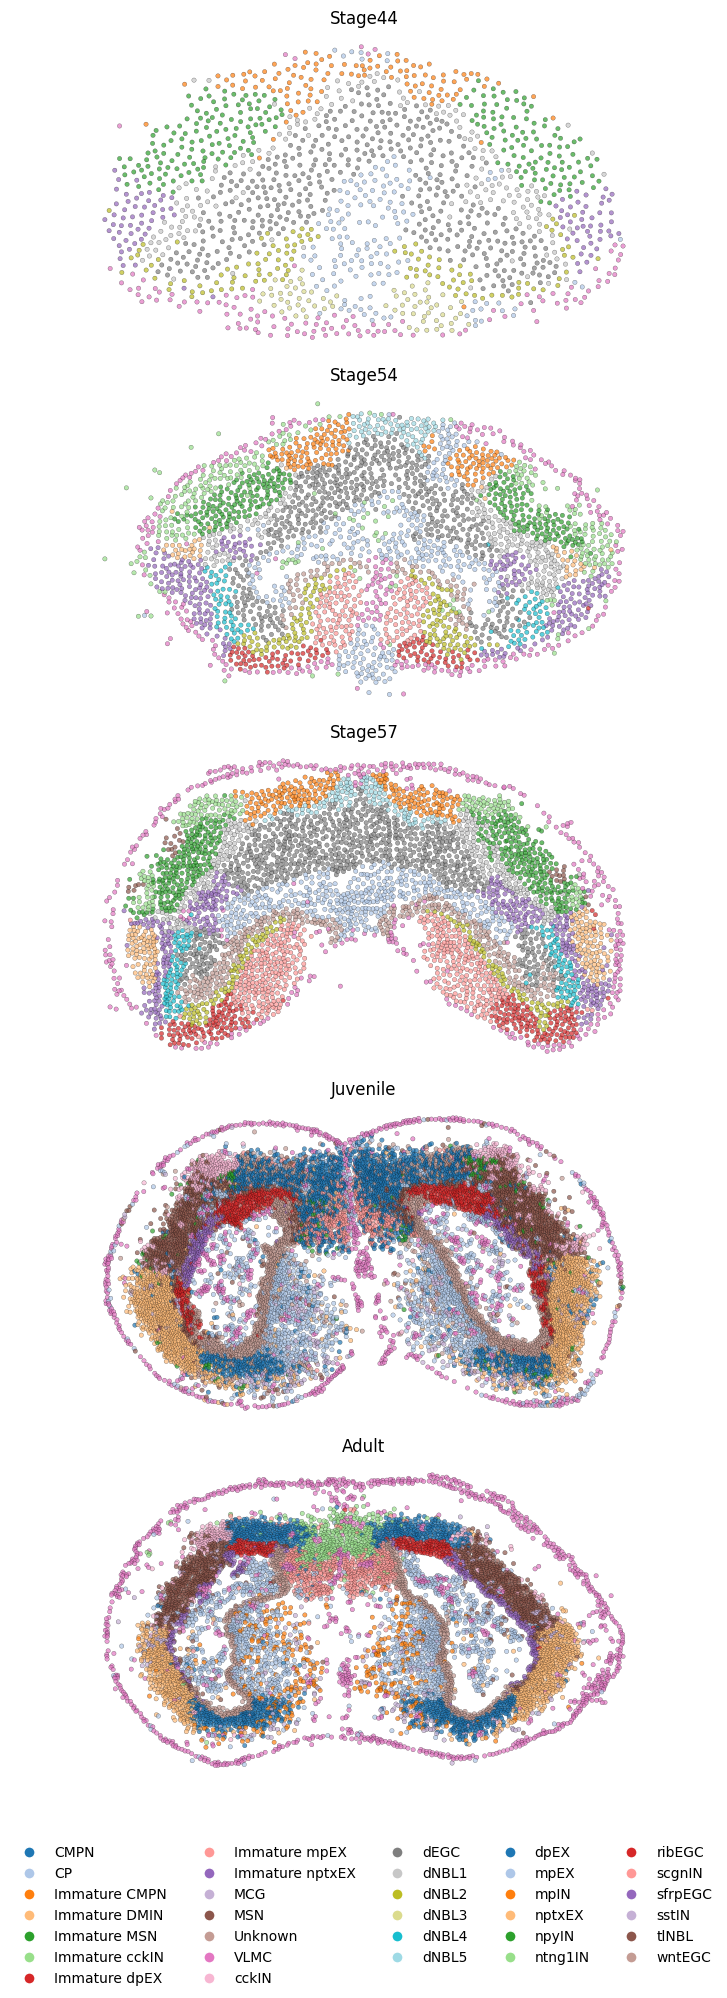

In [2]:
# List of consecutive datasets
consecutive = [
    ["Stage44.h5ad", "Stage54.h5ad"], 
    ["Stage54.h5ad", "Stage57.h5ad"], 
    ["Stage57.h5ad", "Juvenile.h5ad"],
    ["Juvenile.h5ad", "Adult.h5ad"]
]

# Load unique datasets
unique_files = set()
adatas = []
titles = []  # Keep track of dataset names for titles

for pair in consecutive:
    for file in pair:
        if file not in unique_files:
            unique_files.add(file)
            adata = sc.read_h5ad("data/"+file)
            adata.obs["Batch"] = file  # Add batch information
            adatas.append(adata)
            titles.append(file.replace(".h5ad", ""))  # Extract clean names

# Extract all unique cell types across all datasets
all_cell_types = set()
for adata in adatas:
    all_cell_types.update(adata.obs["Annotation"].unique())

# Create a consistent color map for all cell types
palette = sns.color_palette("tab20", len(all_cell_types))
color_dict = dict(zip(sorted(all_cell_types), palette))

# Plot each dataset one by one
fig, axes = plt.subplots(len(adatas), 1, figsize=(6, 4 * len(adatas)))

if len(adatas) == 1:  # Ensure axes is iterable when only one dataset
    axes = [axes]

for ax, adata, title in zip(axes, adatas, titles):
    # Assign colors based on the global dictionary
    adata.obs["Annotation"] = adata.obs["Annotation"].astype(str)
    adata.obs["color"] = adata.obs["Annotation"].map(color_dict)

    # Plot spatial coordinates
    ax.scatter(
        adata.obsm["spatial"][:, 0], 
        adata.obsm["spatial"][:, 1], 
        c=adata.obs["color"], 
        s=10, alpha=0.7, edgecolors="k", linewidth=0.2
    )
    
    ax.set_title(title, fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

# Create a single legend at the bottom
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cell], markersize=8) 
           for cell in sorted(all_cell_types)]
labels = sorted(all_cell_types)

fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit the legend
plt.show()


In [3]:
for adata in adatas:
    print (f"Dataset: {adata.obs['Batch'][0]}")
    print (f"Number of cells: {adata.n_obs}")
    print (f"Number of genes: {adata.n_vars}")
    print (f"Number of cell types: {len(adata.obs['Annotation'].unique())}")
    print ("-" * 50)

Dataset: Stage44.h5ad
Number of cells: 1477
Number of genes: 13098
Number of cell types: 9
--------------------------------------------------
Dataset: Stage54.h5ad
Number of cells: 2929
Number of genes: 21591
Number of cell types: 16
--------------------------------------------------
Dataset: Stage57.h5ad
Number of cells: 4410
Number of genes: 22893
Number of cell types: 17
--------------------------------------------------
Dataset: Juvenile.h5ad
Number of cells: 11698
Number of genes: 19081
Number of cell types: 17
--------------------------------------------------
Dataset: Adult.h5ad
Number of cells: 8243
Number of genes: 22144
Number of cell types: 16
--------------------------------------------------


/tmp/ipykernel_1361067/3005766071.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (f"Dataset: {adata.obs['Batch'][0]}")


/tmp/ipykernel_1361067/3779984288.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch = adata.obs['Batch'][0]


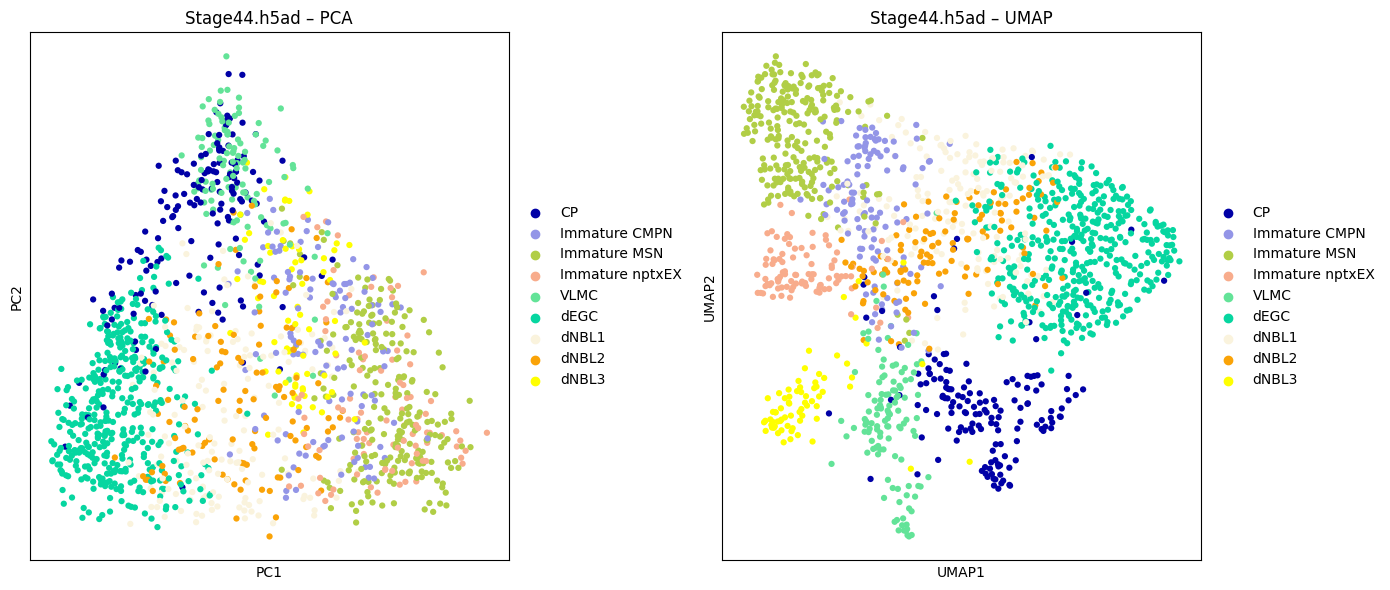

/tmp/ipykernel_1361067/3779984288.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch = adata.obs['Batch'][0]


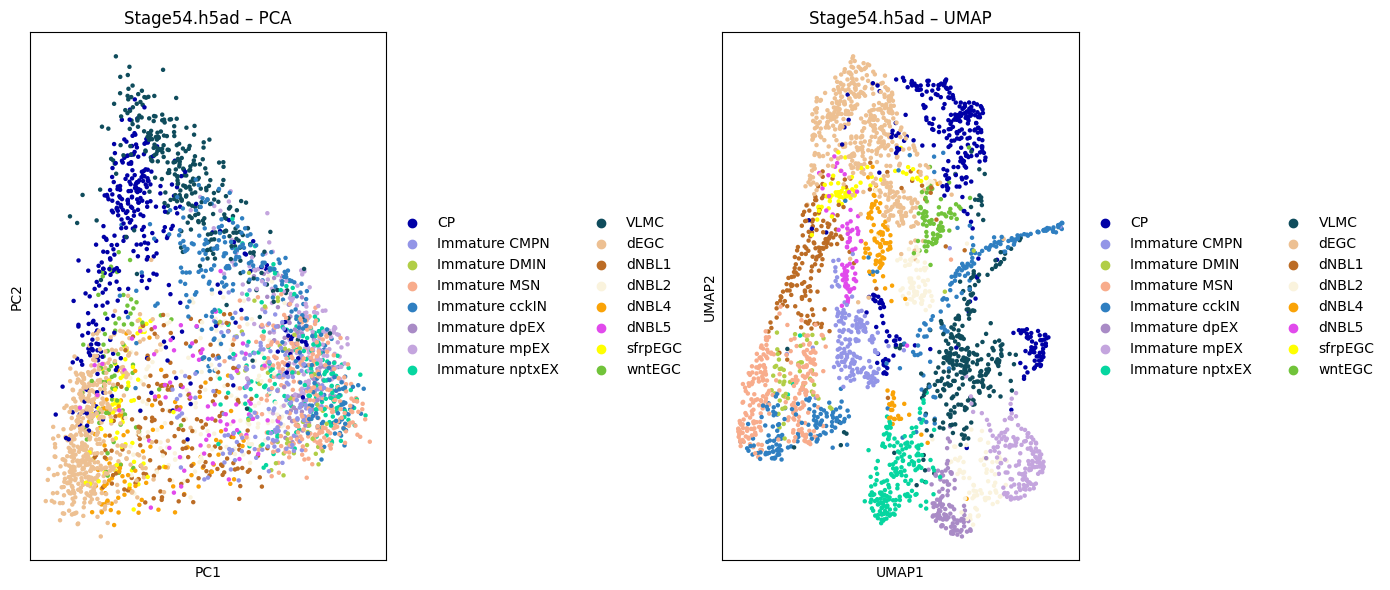

/tmp/ipykernel_1361067/3779984288.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch = adata.obs['Batch'][0]


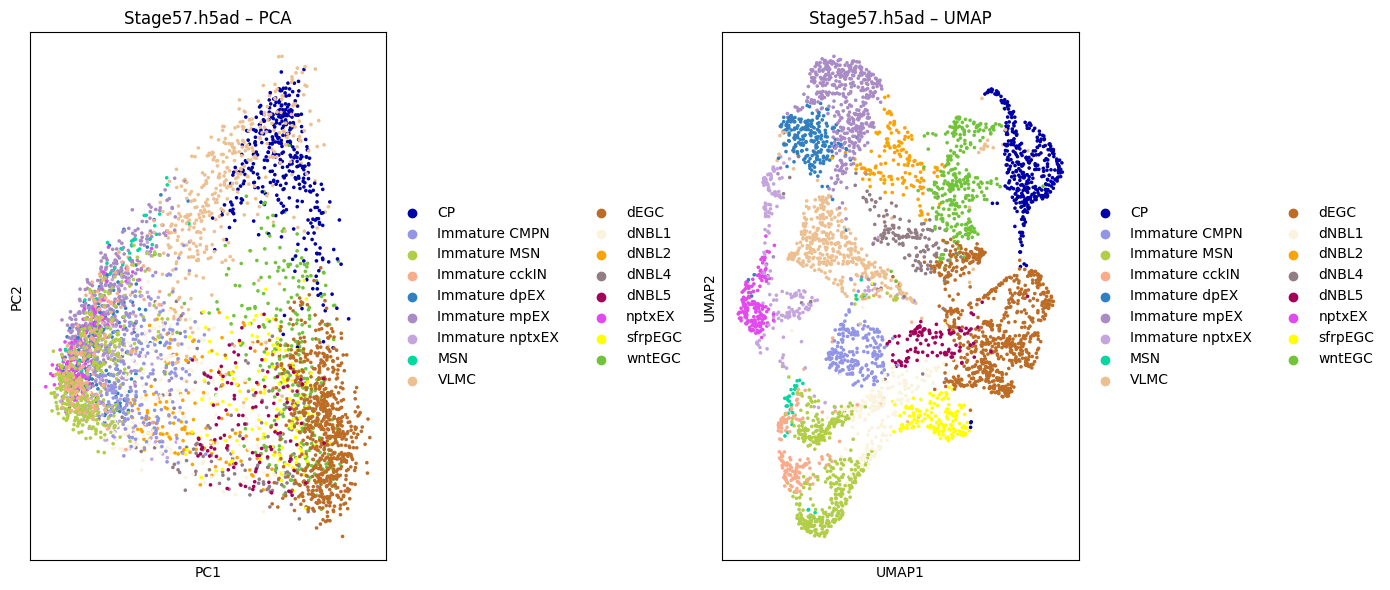

/tmp/ipykernel_1361067/3779984288.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch = adata.obs['Batch'][0]


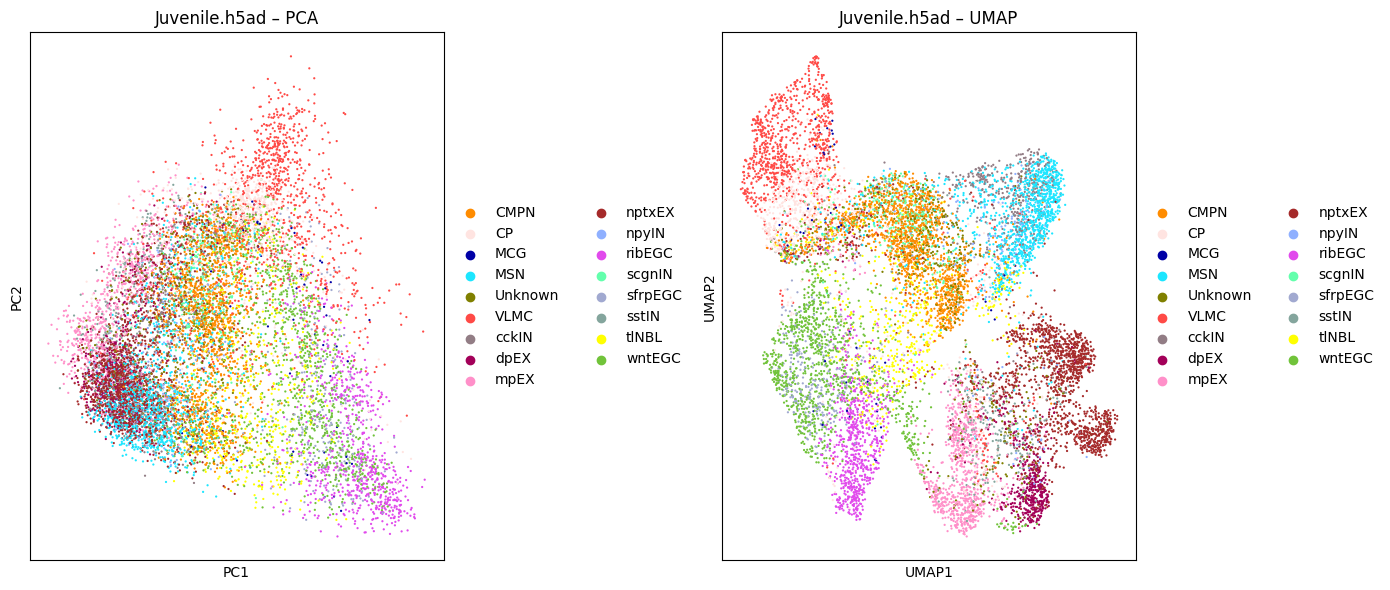

/tmp/ipykernel_1361067/3779984288.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch = adata.obs['Batch'][0]
/home/fceccarelli/miniconda3/envs/FM/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:586: UserWarning: You’re trying to run this on 22144 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  X = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)


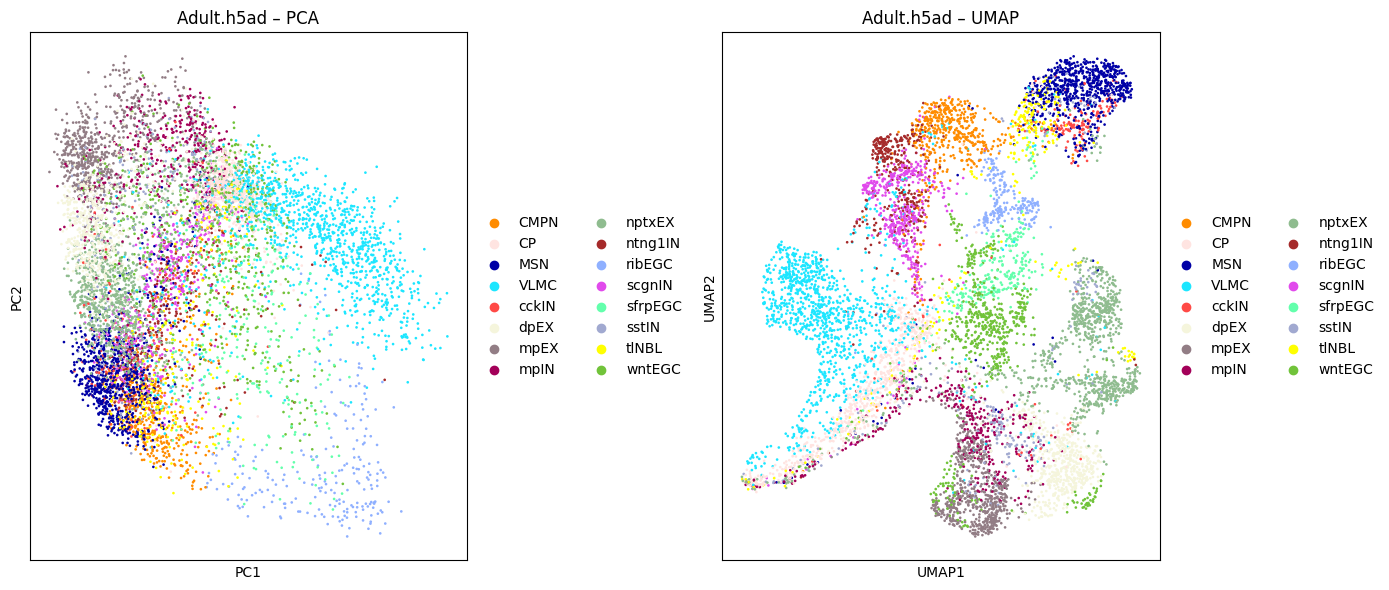

In [5]:
for adata in adatas:
    batch = adata.obs['Batch'][0]

    if 'X_umap' not in adata.obsm:
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

    # PCA was already there so am not running it again
    sc.pl.pca(
        adata,
        color='Annotation',
        title=f"{batch} – PCA",
        ax=axes[0],
        show=False
    )

    # UMAP is not there so am running it
    sc.pl.umap(
        adata,
        color='Annotation',
        title=f"{batch} – UMAP",
        ax=axes[1],
        show=False
    )

    plt.tight_layout()
    plt.show()

In [6]:
combined_adata = ad.concat(adatas, label='Batch', keys=titles)
if "color" in combined_adata.obs.columns:
    combined_adata.obs.drop(columns=["color"], inplace=True)
combined_adata.obs

/home/fceccarelli/miniconda3/envs/FM/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


,CellID,Batch,cell_id,Annotation
CELL.1,CELL.1,Stage44,1,Immature nptxEX
CELL.3,CELL.3,Stage44,3,Immature nptxEX
CELL.4,CELL.4,Stage44,4,VLMC
CELL.6,CELL.6,Stage44,6,CP
CELL.8,CELL.8,Stage44,8,Immature nptxEX
...,...,...,...,...
CELL.10621,CELL.10621,Adult,10621,VLMC
CELL.10623,CELL.10623,Adult,10623,VLMC
CELL.10624,CELL.10624,Adult,10624,VLMC
CELL.10626,CELL.10626,Adult,10626,VLMC


In [7]:
# Save the final combined dataset
combined_adata.write("data/combined_stereoSeq.h5ad")
print (f"Combined dataset saved as 'data/combined_stereoSeq.h5ad' with {combined_adata.n_obs} cells and {combined_adata.n_vars} genes.")

Combined dataset saved as 'data/combined_stereoSeq.h5ad' with 28757 cells and 12771 genes.
